<a href="https://colab.research.google.com/github/tk03145/tharun_INFO5502_SPRING2022/blob/main/INFO_5502_Final_Exam_Spring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 240 points in total)

<span style='background:yellow'>**Question 1 (40 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):



In [2]:
import numpy as np
def calconfmat(y_true,y_pred):
  uniqclass = np.unique(y_true)
  ans = np.zero(len(uniqclass),len(uniqclass))
  for i in range(len(uniqclass)):
    for j in range(len(uniqclass)):
      ans[i,j]=np.sum((y_true==uniqclass[i])&(y_pred==uniqclass[j]))
  return ans

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  del sys.path[0]


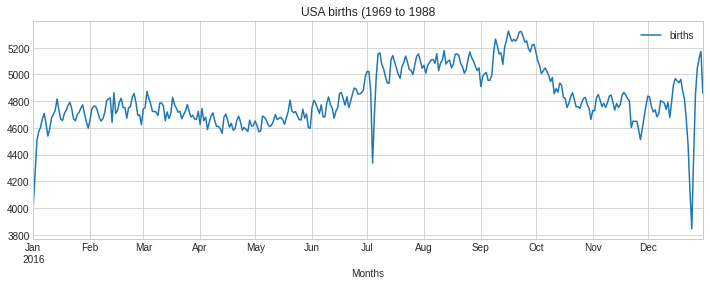

In [31]:
q = np.percentile(data['births'], [25, 50, 75])
mu, sig = q[1], 0.74 * (q[2] - q[0])
b = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

b['day'] = b['day'].astype(int)

b.index = pd.to_datetime(10000 * b.year +
                              100 * b.month +
                              b.day, format='%Y%m%d')
b_by_date = b.pivot_table('births',
                                    [b.index.month, b.index.day])
b_by_date.index = [pd.datetime(2016, month, day)
for (month, day) in b_by_date.index]
fig,ax = plt.subplots(figsize=(12, 4))
plt.title("USA births (1969 to 1988")
plt.xlabel("Months")
b_by_date.plot(ax=ax);

<span style='background:yellow'>**Question 2 (40 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 



In [49]:
def calculate(TP,TN,FP,FN,c):

  a = (TP + TN) / (TP+ TN+ FP+ FN)
  r = (TP) / (TP+FN)
  p = (TP) / (TP+FP)
  f1_s = (2*p*r) / (p + r)
  print("-----------------------------------")
  print("calss ",format(c))
  print("accuracy" , a)
  print("recall", r)
  print("precision", p)
  print("f1_score",f1_s)
  print("------------------------------------")
TP1=157
TN1=428
FP1=76
FN1	=111

TP2=151
TN2	=434
FP2	=118
FN2	=98

	

TP3	=135
TN3	=450
FP3	=108
FN3	=73

	

TP4	=70
TN4	=515
FP4	=66
FN4	=54


TP5	=56
TN5	=529
FP5	=30
FN5	=49

	

TP6	=16
TN6	=569
FP6	=22
FN6	=35

calculate(TP1,TN1,FP1,FN1,1)
calculate(TP2,TN2,FP2,FN2,2)
calculate(TP3,TN3,FP3,FN3,3)
calculate(TP4,TN4,FP4,FN4,4)
calculate(TP5,TN5,FP5,FN5,5)
calculate(TP6,TN6,FP6,FN6,6)

-----------------------------------
calss  1
accuracy 0.7577720207253886
recall 0.585820895522388
precision 0.6738197424892703
f1_score 0.626746506986028
------------------------------------
-----------------------------------
calss  2
accuracy 0.7303370786516854
recall 0.606425702811245
precision 0.5613382899628253
f1_score 0.583011583011583
------------------------------------
-----------------------------------
calss  3
accuracy 0.7637075718015666
recall 0.6490384615384616
precision 0.5555555555555556
f1_score 0.598669623059867
------------------------------------
-----------------------------------
calss  4
accuracy 0.8297872340425532
recall 0.5645161290322581
precision 0.5147058823529411
f1_score 0.5384615384615384
------------------------------------
-----------------------------------
calss  5
accuracy 0.8810240963855421
recall 0.5333333333333333
precision 0.6511627906976745
f1_score 0.5863874345549738
------------------------------------
-----------------------------------
cals

In [58]:
import numpy as np

conf_matrix = [[157,46,25,22,15,3],
              [28,151,45,18,1,6],
              [11,38,135,14,3,7],
              [11,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,16]]

conf = np.array(conf_matrix)



for i in range(len(conf)):
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = conf[i,i]
    FP = conf[i,:].sum() - TP
    FN = conf[:,i].sum() - TP
    TN = conf.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/conf.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)
    
    print(f'The accuracy of class{i} is {accuracy}')
    print(f'The precision of class{i} is {precision}')
    print(f'The recall of class{i} is {recall}')
    print(f'The F1-Score of class{i} is {f1_score}')
    print()

The accuracy of class0 is 0.8139303482587065
The precision of class0 is 0.585820895522388
The recall of class0 is 0.6738197424892703
The F1-Score of class0 is 0.626746506986028

The accuracy of class1 is 0.7850746268656716
The precision of class1 is 0.606425702811245
The recall of class1 is 0.5613382899628253
The F1-Score of class1 is 0.583011583011583

The accuracy of class2 is 0.8199004975124378
The precision of class2 is 0.6490384615384616
The recall of class2 is 0.5555555555555556
The F1-Score of class2 is 0.598669623059867

The accuracy of class3 is 0.8805970149253731
The precision of class3 is 0.5645161290322581
The recall of class3 is 0.5147058823529411
The F1-Score of class3 is 0.5384615384615384

The accuracy of class4 is 0.9213930348258706
The precision of class4 is 0.5333333333333333
The recall of class4 is 0.6511627906976745
The F1-Score of class4 is 0.5863874345549738

The accuracy of class5 is 0.9432835820895522
The precision of class5 is 0.3137254901960784
The recall of 

<span style='background:yellow'>**Question 3 (100 pt, each sub-question is 10 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in the training data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.

(6) Repeat Question 5 to clean the testing data.

(7) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?

(8) Randomly sample 100 pairs of sequences from both classes and calculate the median cosine similarity.

(9) Refer back to Question 2, parse the data into a length of 5, 10, 15, and 20. Clean the data from each class using Question 5. For each sequence length, calculate the median cosine similarity of 100 random pairs of sequences from both classes. 

(10) Plot a line chart to visualize how the median cosine similarities vary through different sequence lengths from 5 to 25.


<span style='background:yellow'>**Question 4 (60 pt, each sub-question is 20 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?


(3) Draw the A/B testing related visualizations.

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import norm
data=pd.read_csv('/Software_Reviews_csv_files_S.csv')
a = data[(data['incentivized'] == "NominalGift") | (data['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']#.shape
b = data[(data['incentivized'] == "NoIncentive") | (data['incentivized'] == "NonNominalGift") | (data['incentivized'] == "VendorReferred")]['OverAllRating']#.shape
N_con = a.shape[0]
N_exp = b.shape[0]
alpha = 0.08
mu_con = np.mean(a)
mu_exp = np.mean(b)
print(a)

1       4
2       1
3       4
15      5
17      5
       ..
2994    5
2995    5
2996    5
2997    5
2998    5
Name: OverAllRating, Length: 1015, dtype: object


Test Statistics stat:  nan
Z-critical:  1.7506860712521692
P_value:  nan
Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


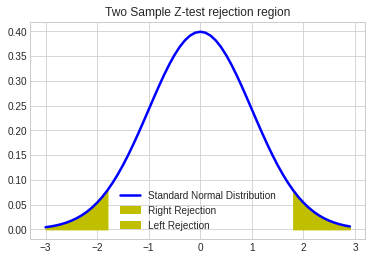

In [57]:
a = a.astype('float')
b = b.astype('float')
v_con = np.var(a)
v_exp = np.var(b)
pooled_variance = np.sqrt(v_con/N_con + v_exp/N_exp)
D = (mu_con-mu_exp)/np.sqrt(v_con/N_con + v_exp/N_exp)
p_value = norm.sf(D)*2
Z_crit  = norm.ppf(1-alpha/2)
t = Z_crit*pooled_variance
CI = [(mu_con - mu_exp) - t, (mu_con - mu_exp) + t]
print("Test Statistics stat: ", D)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
p = np.arange(-3,3,  0.1)
plt.plot(p, norm.pdf(p), label = 'Standard Normal Distribution',color = 'blue',linewidth = 2.5)
plt.fill_between(p[p>Z_crit], norm.pdf(p[p>Z_crit]), label = 'Right Rejection ',color ='y' )
plt.fill_between(p[p<(-1)*Z_crit], norm.pdf(p[p<(-1)*Z_crit]), label = 'Left Rejection ',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()